# **Business Understanding**

## Problem Statement


- The stakeholder for this project is a ***real estate investment firm*** seeking to construct residential homes in the United States that promise a high return on investment. This project entails performing a time series analysis on a Zillow dataset covering various locations across the country to identify these prime investment areas.
***Stake Holder:** The Bizzaro Real Estate Agency
***Objectives:**

*   Identify the top 5 zip codes for the real estate agency to invest in.
*   Forecast future house prices in these zip codes.
*   Provide insights and recommendations








# **Data Understanding**

The dataset used in this project comprises historical median house prices from various states in the USA, spanning from April 1996 to April 2018 (22 years). This data was obtained from the [Zillow website](https://www.zillow.com/research/data/).

The dataset contains 14,723 rows and 272 columns, with 4 categorical columns and 268 numerical columns.

#### Column Names and Descriptions:
- **RegionID**: Unique identifier for each region.
- **RegionName**: Names of the regions (zip codes).
- **City**: Names of the cities for the regions.
- **State**: Names of the states.
- **Metro**: Names of the metropolitan areas.
- **CountyName**: Names of the counties.
- **SizeRank**: Rank of zip codes by urbanization.
- **Date Columns (265 Columns)**: Median house prices across the years.



**Data Preparation**


*   Importing libraries:  
Before we embark on our journey through the housing market analysis, it's essential to equip ourselves with a
comprehensive set of data science tools. Our toolkit includes numpy and pandas for advanced data handling, matplotlib and seaborn
for engaging visualization, and a collection of sklearn features ans statsmodela for data preprocessing, creation, time series analysis, and
performance evaluation.







In [1]:
# importing relevant libraries

# Analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# Modelling libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# import pmdarima as pm #a library to help with auto_arima
import itertools

# Metrics Libraries
from sklearn.metrics import mean_absolute_percentage_error

To begin our predictive analysis of COVID-19, we first import the dataset from `'zillow_data.csv'` using pandas, a powerful tool for data manipulation. We create a copy of the dataset to preserve the original data, enabling us to explore and manipulate it without altering the source. We then preview the dataset to familiarize ourselves with its structure. Using `df.head()`, we can view the top 5 rows, and `df.tail()` provides a look at the last 5 rows, giving us a comprehensive overview of the dataset's contents.

In [2]:
data = pd.read_csv('zillow_data.csv')
df = data.copy()
df.head() #preview the first 5 columns of the data set

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.tail() # preview the last five columns of the dataset

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [4]:
df.columns #view the column names

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)



*   Data Preview and Cleaning

The RegionName contains zipcode data. It will be renamed to Zipcode.






In [5]:
df = df.rename(columns={'RegionName': 'Zipcode'})

* Checking for duplicates

Our dataset does not have duplicates

In [6]:
df.duplicated().sum()

0

* Checking the data information

In [7]:


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        14723 non-null  object
 1   State       14723 non-null  object
 2   Metro       13680 non-null  object
 3   CountyName  14723 non-null  object
dtypes: object(4)
memory usage: 460.2+ KB


In [9]:
df.select_dtypes(include='int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   RegionID  14723 non-null  int64
 1   Zipcode   14723 non-null  int64
 2   SizeRank  14723 non-null  int64
 3   2014-07   14723 non-null  int64
 4   2014-08   14723 non-null  int64
 5   2014-09   14723 non-null  int64
 6   2014-10   14723 non-null  int64
 7   2014-11   14723 non-null  int64
 8   2014-12   14723 non-null  int64
 9   2015-01   14723 non-null  int64
 10  2015-02   14723 non-null  int64
 11  2015-03   14723 non-null  int64
 12  2015-04   14723 non-null  int64
 13  2015-05   14723 non-null  int64
 14  2015-06   14723 non-null  int64
 15  2015-07   14723 non-null  int64
 16  2015-08   14723 non-null  int64
 17  2015-09   14723 non-null  int64
 18  2015-10   14723 non-null  int64
 19  2015-11   14723 non-null  int64
 20  2015-12   14723 non-null  int64
 21  2016-01   14723 non-null  int64
 22

In [10]:
df.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 219 entries, 1996-04 to 2014-06
dtypes: float64(219)
memory usage: 24.6 MB


* The columns have three data types:
Integers,
Float,
Object


* The dataset contains 14,723 rows and 272 columns, with 4 categorical columns and 268 numerical columns.

* **Handling missing values**




In [11]:

print(f'The data has {df.isna().sum().sum()} missing values')
#checking the percentage of missing values in columns that have object data types
df.select_dtypes(include='object').isna().sum()/len(df) *100

The data has 157934 missing values


City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
dtype: float64

The missing values in the metro column will be replaced with 'missing' to avoid the risk of incorrect assumptions that might come from default imputation methods like filling with the mode, which might interfere with the data integrity.

In [12]:
# imputing the missing values by replacing them with 'missing'

df.Metro.fillna('missing', inplace=True)

In [13]:
#checking the percentage of missing values in columns that have integer data types
df.select_dtypes(include='int64').isna().sum()/len(df) *100


RegionID    0.0
Zipcode     0.0
SizeRank    0.0
2014-07     0.0
2014-08     0.0
2014-09     0.0
2014-10     0.0
2014-11     0.0
2014-12     0.0
2015-01     0.0
2015-02     0.0
2015-03     0.0
2015-04     0.0
2015-05     0.0
2015-06     0.0
2015-07     0.0
2015-08     0.0
2015-09     0.0
2015-10     0.0
2015-11     0.0
2015-12     0.0
2016-01     0.0
2016-02     0.0
2016-03     0.0
2016-04     0.0
2016-05     0.0
2016-06     0.0
2016-07     0.0
2016-08     0.0
2016-09     0.0
2016-10     0.0
2016-11     0.0
2016-12     0.0
2017-01     0.0
2017-02     0.0
2017-03     0.0
2017-04     0.0
2017-05     0.0
2017-06     0.0
2017-07     0.0
2017-08     0.0
2017-09     0.0
2017-10     0.0
2017-11     0.0
2017-12     0.0
2018-01     0.0
2018-02     0.0
2018-03     0.0
2018-04     0.0
dtype: float64

Integer data types have no missing values.

In [14]:
#checking the percentage of missing values in columns that have float data types
df.select_dtypes(include='float64').isna().sum()/len(df) *100

1996-04    7.056986
1996-05    7.056986
1996-06    7.056986
1996-07    7.056986
1996-08    7.056986
             ...   
2014-02    0.380357
2014-03    0.380357
2014-04    0.380357
2014-05    0.380357
2014-06    0.380357
Length: 219, dtype: float64

- The missing values in the date columns will be filled through interpolation.This helps in maintaining the continuity and trends in the dataset, which is particularly important in time series data

In [15]:
# interpolate missing values on date columns
df.interpolate(inplace=True)

- Checking different columns  data types to ensure that they are correct.

- Region ID is a unique identifier so it will be dropped

In [16]:
for x in df.columns[:5]:
    print(x, ":", df[x].dtype,'\n')

RegionID : int64 

Zipcode : int64 

City : object 

State : object 

Metro : object 



In [17]:
for x in df.columns[:5]:
    print(x, ":", df[x].unique(),'\n')

RegionID : [84654 90668 91982 ... 75672 93733 95851] 

Zipcode : [60657 75070 77494 ... 40404 81225 89155] 

City : ['Chicago' 'McKinney' 'Katy' ... 'Pine Valley' 'Esopus'
 'Mount Crested Butte'] 

State : ['IL' 'TX' 'NY' 'CA' 'FL' 'TN' 'NC' 'GA' 'DC' 'MO' 'OK' 'AZ' 'NJ' 'MD'
 'VA' 'WA' 'OH' 'MI' 'MA' 'KS' 'NM' 'CT' 'NV' 'PA' 'CO' 'OR' 'IN' 'SC'
 'KY' 'AR' 'ND' 'MN' 'AL' 'DE' 'LA' 'MS' 'ID' 'MT' 'HI' 'WI' 'UT' 'ME'
 'SD' 'WV' 'IA' 'RI' 'NE' 'WY' 'AK' 'NH' 'VT'] 

Metro : ['Chicago' 'Dallas-Fort Worth' 'Houston' 'El Paso' 'New York'
 'San Francisco' 'The Villages' 'Nashville'
 'Los Angeles-Long Beach-Anaheim' 'Austin' 'Charlotte' 'McAllen' 'Atlanta'
 'Washington' 'San Antonio' 'Clarksville' 'St. Louis' 'Oklahoma City'
 'Phoenix' 'Baltimore' 'Miami-Fort Lauderdale' 'Brownsville'
 'Virginia Beach' 'Seattle' 'Cleveland' 'Ann Arbor' 'Boston' 'Kansas City'
 'Sacramento' 'Tucson' 'Jacksonville' 'Napa' 'San Diego' 'Albuquerque'
 'Hartford' 'Las Vegas' 'Lancaster' 'Fresno' 'Denver' 'Detroit' 'V

- The appropriate datatype for Zipcodes is typically string or object.Let's convert the data types to string. Zipcodes generally contain 5 digits but in our dataframe some have less than 5 digits.Te columns with 4 didgits will be filled with a zero at the beginning

In [18]:
df.Zipcode = df.Zipcode.astype(str).str.zfill(5)
print(df.dtypes["Zipcode"])


object


* To solve the problems raised under business understanding, two columns will be created.
- Return on Investment (ROI)

* ROI is a measure of returns expected from investments.

- Coefficient of variation (CV)

CV is a measure of the dispersion of data points around the mean and represents the ratio of the standard deviation to the mean. It allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.

In [19]:
# calculating and creating a new column -ROI

df['ROI'] = (df['2018-04']/ df['1996-04'])-1



#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [20]:
df[["Zipcode", "ROI", "CV"]].head()

,Zipcode,ROI,CV
0,60657,2.083782,0.256487
1,75070,0.365295,0.152680
2,77494,0.567966,0.143950
3,60614,1.623971,0.237364
4,79936,0.571798,0.178326


* **Time Series Dataset**

In this section we convert our dataset from wide format to long format .By melting the data, we prepare it for further analysis, visualization, and modeling, facilitating a more effective and efficient workflow.

In [21]:
df1 = df.copy()

In [22]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
                                  'ROI', 'CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [23]:
df1 = melt_df(df1)

In [24]:
df1.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,Date,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,1996-04-01,77300.0


In [25]:
df1.dtypes # checking the data types of each column

RegionID               int64
Zipcode               object
City                  object
State                 object
Metro                 object
CountyName            object
SizeRank               int64
ROI                  float64
CV                   float64
Date          datetime64[ns]
value                float64
dtype: object

In [26]:
df1['Date'] = pd.to_datetime(df1['Date'], format="%y/%m") ## Converting the date data type into date tim

In [27]:
df1.duplicated().sum() # checking for duplicates

0

In [28]:
df1.set_index('Date', inplace=True) # Set the 'Date' column as index

In [29]:
df1.head() #preview the first 5 columns of the data set

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,value
Date,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,77300.0


In [30]:
df1 = df1.rename(columns={'value': 'MedianHousePrice'}) # renaming the column name

### EDA


* Distribution of house prices

In [31]:
# plt.figure(figsize=(16,8))
# sns.histplot(df1['MedianHousePrice'], kde=True)
# plt.title('Distribution of Median House Prices')
# plt.xlabel('Median House Price')
# plt.ylabel('Frequency')
# plt.show();

- Observations:  The diagram above shows that most houses cost around 100000 dollars.

* What are the top 10 most affordale states?

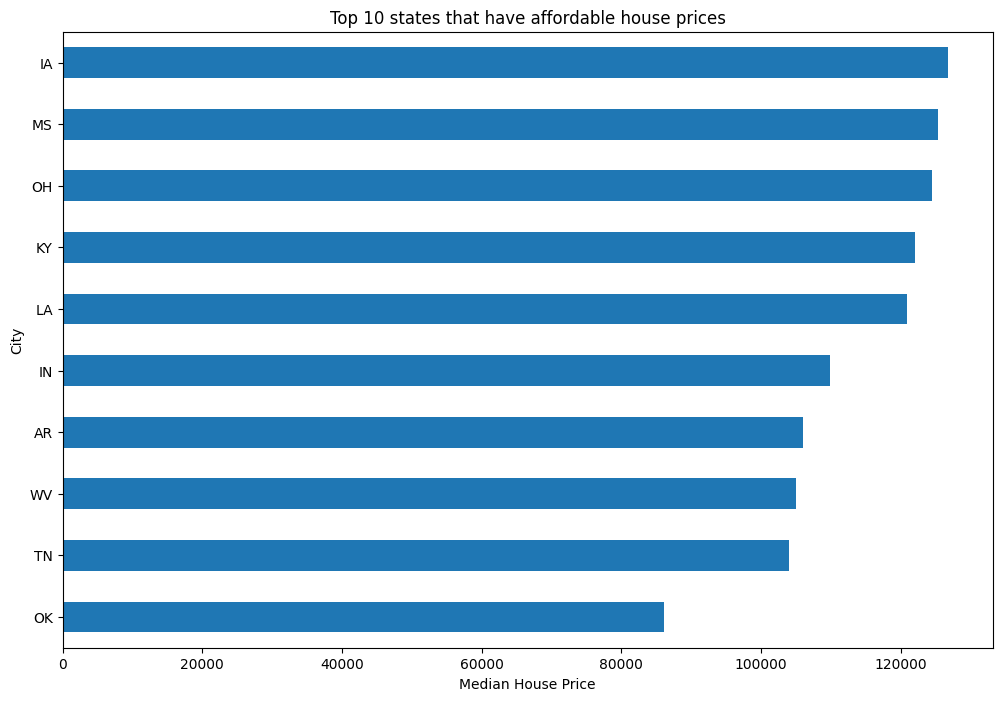

In [32]:

affordable_states = df1.groupby('State')['MedianHousePrice'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 8))
affordable_states.plot(kind='barh')
plt.title('Top 10 states that have affordable house prices')
plt.xlabel('Median House Price')
plt.ylabel('City')
plt.show();

- Observations:The following states tend to have affordable houses ,  'TN' :Tennessee being the most affordable state in the states others include;
SD: South Dakota
OK: Oklahoma
OH: Ohio
IN: Indiana
IA: Iowa
AR: Arkansas
KY: Kentucky
ME: Maine
WV: West Virginia


* WHat are the  top 10 most expsensive states in terms of House prices?

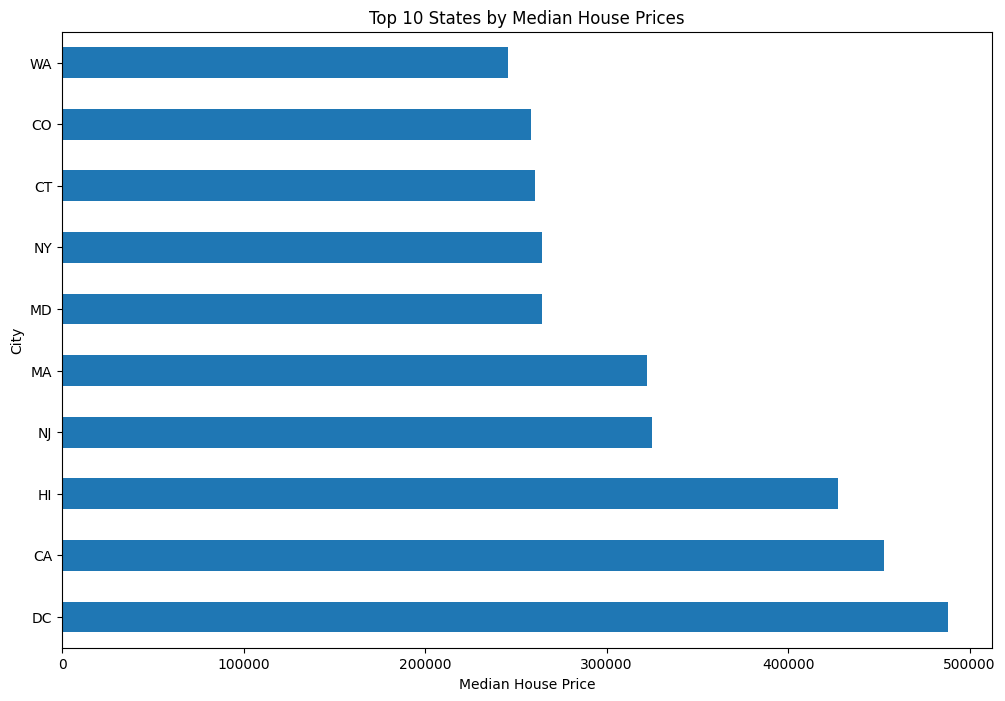

In [33]:

expensive_states = df1.groupby('State')['MedianHousePrice'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
expensive_states.plot(kind='barh')
plt.title('Top 10 States by Median House Prices')
plt.xlabel('Median House Price')
plt.ylabel('City')
plt.show()

-Observations: The following states tend to have expsensive houses.
 **NY (New York)**  has the highest median house price, around $600,000 followed by
 **HI (Hawaii)** ,
 **CA (California)** ,
 **DC (District of Columbia)**,
 **NJ (New Jersey)** ,
 **WA (Washington)**,
 **MA (Massachusetts)**,
 **IL (Illinois)** ,
 **VA (Virginia)** and
 **AK (Alaska)**  


 What are the  top 10 most affordable cities in terms of House prices?

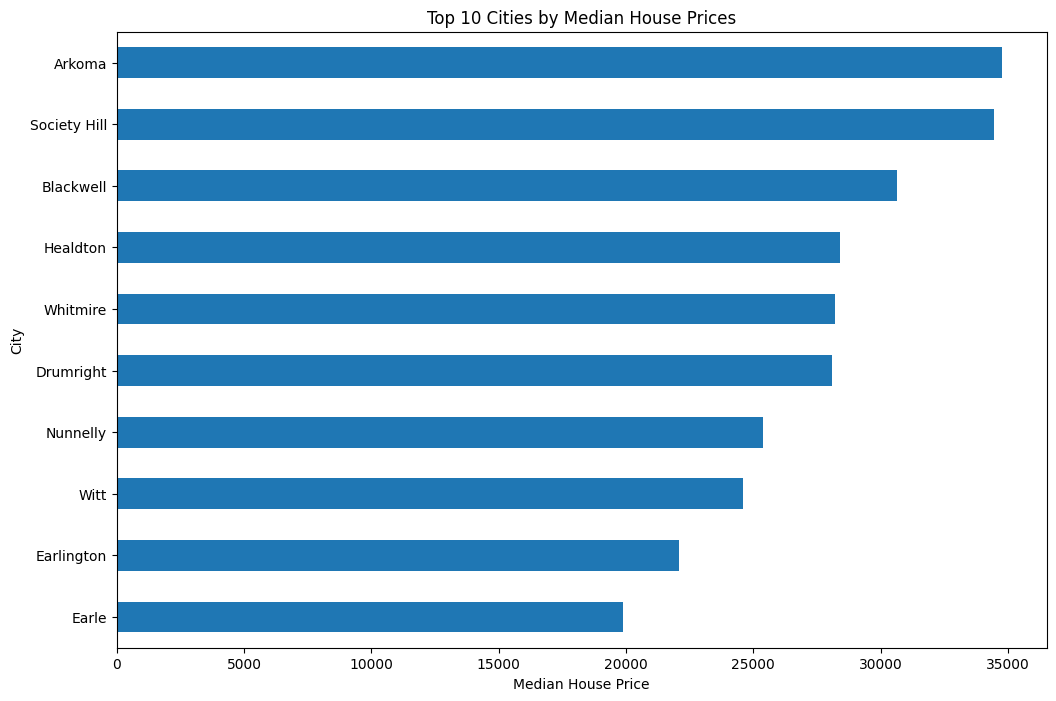

In [34]:
cheapest_cities = df1.groupby('City')['MedianHousePrice'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 8))
cheapest_cities.plot(kind='barh')
plt.title('Top 10 Cities by Median House Prices')
plt.xlabel('Median House Price')
plt.ylabel('City')
plt.show();

- Observations:Wilkes-Barre  is the cheapest city in terms of house pricing followed by
Jamestown       
Brownsville  ,
Cleveland  ,
Wilkinsburg  ,
Harlingen  ,
Granite City  ,
Pharr  ,
Reidsville and
Port Huron   .

*  The houses in this cities range from approximately 55000 to 72000

 Which  top 10 cities have  the  most expensive houses?

City
Atherton            3.487129e+06
Palm Beach          2.634498e+06
Snowmass Village    2.300179e+06
Portola Valley      2.131495e+06
Newport Coast       2.070006e+06
Montecito           1.991682e+06
Aspen               1.988169e+06
Rancho Santa Fe     1.959659e+06
Malibu              1.876195e+06
Los Altos           1.866172e+06
Name: MedianHousePrice, dtype: float64


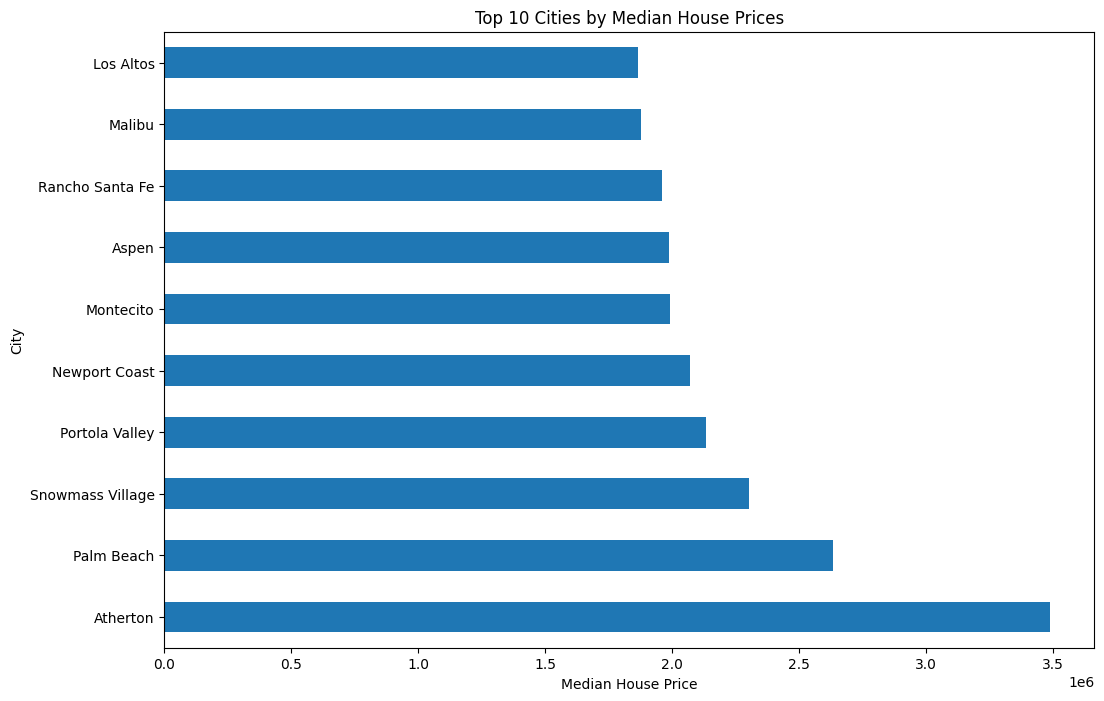

In [35]:
expensive_cities = df1.groupby('City')['MedianHousePrice'].mean().sort_values(ascending=False).head(10)
print(expensive_cities)
plt.figure(figsize=(12, 8))
expensive_cities.plot(kind='barh')
plt.title('Top 10 Cities by Median House Prices')
plt.xlabel('Median House Price')
plt.ylabel('City')
plt.show() ;



*   Observations:Burlingame is the most expensive city in the USA followed by;
Newport Beach
San Francisco
Menlo Park
Cupertino
Bellevue ,
Miami Beach ,
Hoboken ,
Rancho Palos Verdes and
Sunnyvale ,

*   The house prices in these citites range from  approximately1,501,827 dollars to 881,347 dollars



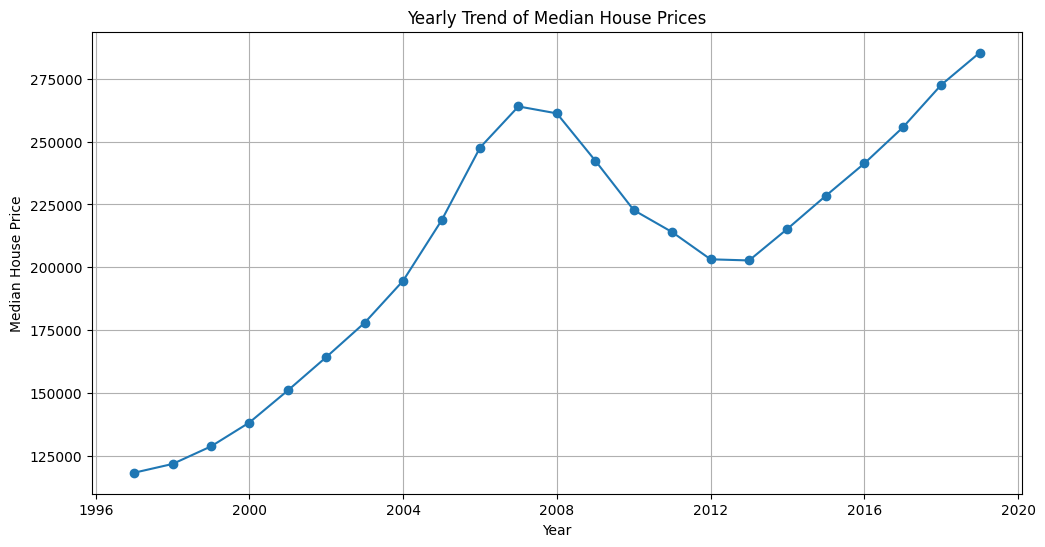

In [36]:
# Resample the data by year and calculate the mean median house price
yearly_data = df1['MedianHousePrice'].resample('A').mean()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data, marker='o')
plt.title('Yearly Trend of Median House Prices')
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

- Observations:Initial Growth (1996-2007):

- There is a steady increase in median house prices from 1996 to around 2007.
The growth accelerates significantly from around 2000 to 2007.
- Following the peak, there is a notable decline in prices, bottoming out around 2012.
- From 2012 onwards, there is a consistent and steady increase in house prices up to 2020

Does urbanization  rank affect the average house prices?

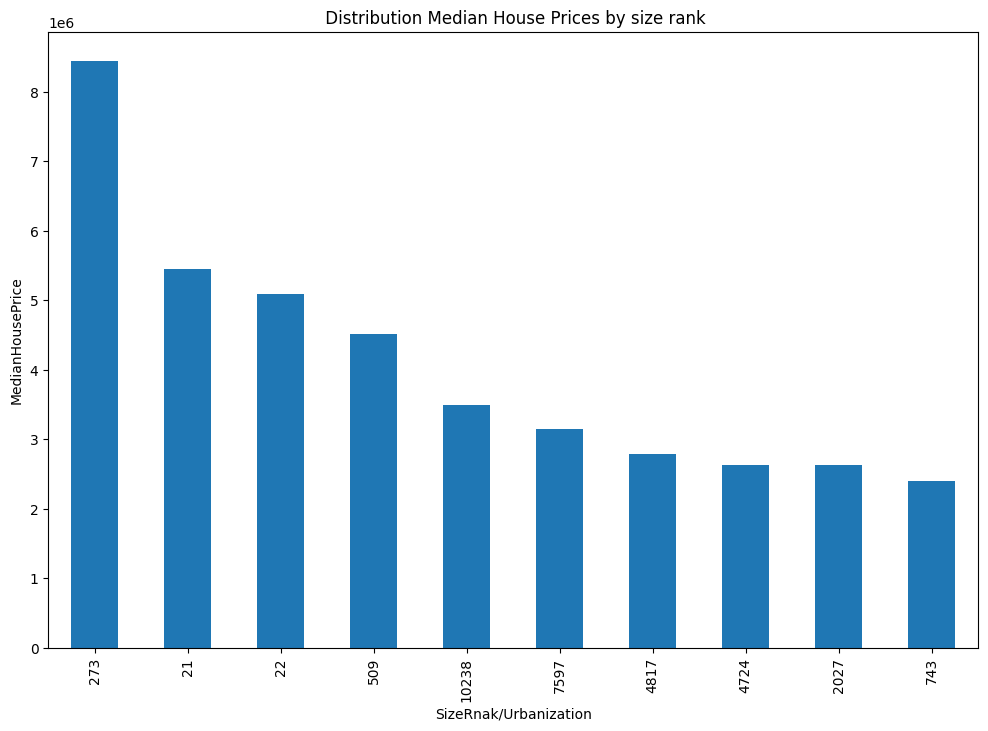

In [37]:
# Does sizerank affect the House prices
urb = df1.groupby('SizeRank')['MedianHousePrice'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
urb.plot(kind='bar')
plt.title(' Distribution Median House Prices by size rank')
plt.xlabel('SizeRnak/Urbanization')
plt.ylabel('MedianHousePrice')
plt.show() ;

- Observations: Urbanisation has no effect on the house prices .

*  What top 10 Zipcodes have the highest ROI?

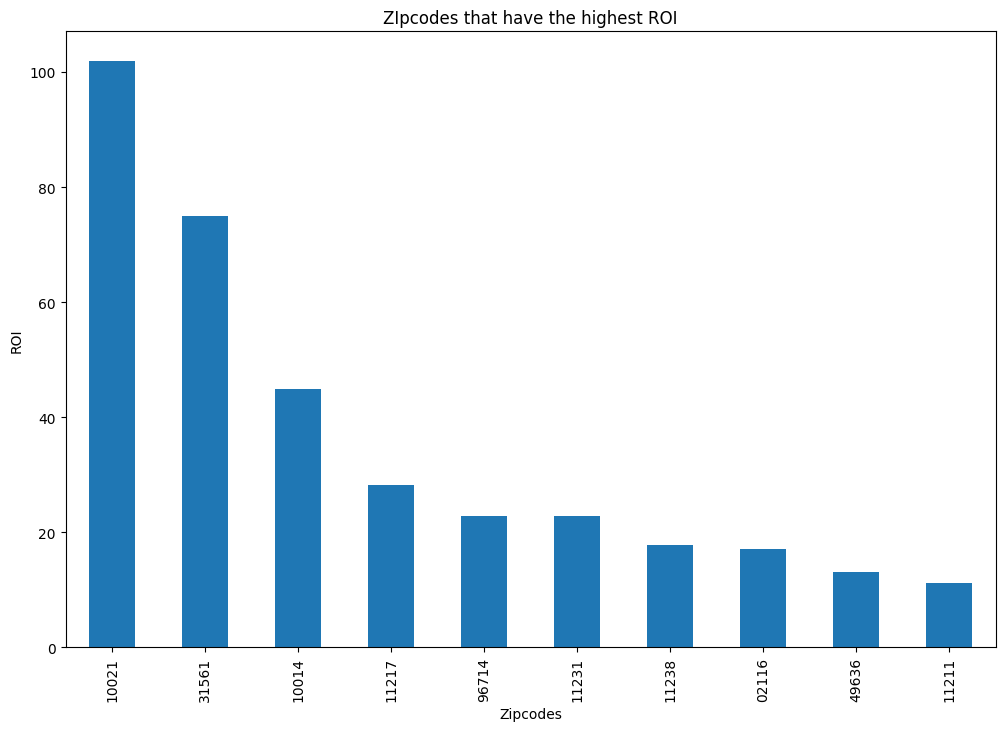

In [38]:
 ##What top 5 Zipcodes have the highest ROI?
zipcodes = df1.groupby('Zipcode')['ROI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
zipcodes.plot(kind='bar')
plt.title('ZIpcodes that have the highest ROI')
plt.xlabel('Zipcodes')
plt.ylabel('ROI')
plt.show() ;

In [39]:
# zipcodes = df1.groupby('Zipcode')['ROI'].mean().sort_values(ascending=False)
top_zipcodes_df = zipcodes.reset_index()

# If 'Date' is already the index, reset it
if df1.index.name == 'Date':
    df1_reset = df1.reset_index()
else:
    df1_reset = df1

# Filter the original DataFrame to include only the top 5 zip codes
filtered_df = df1_reset[df1_reset['Zipcode'].isin(top_zipcodes_df['Zipcode'])]

# Set 'Date' as the index
filtered_df.set_index('Date', inplace=True)

# Print the resulting DataFrame
filtered_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,MedianHousePrice
Date,,,,,,,,,,
1996-04-01,62022,11211,New York,NY,New York,Kings,118,11.189940,0.663802,133200.0
1996-04-01,62048,11238,New York,NY,New York,Kings,157,17.827406,0.742942,153250.0
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173800.0
1996-04-01,61628,10014,New York,NY,New York,New York,509,44.968702,0.795409,194900.0
1996-04-01,62028,11217,New York,NY,New York,Kings,1535,28.154705,0.793134,125400.0
...,...,...,...,...,...,...,...,...,...,...
2018-04-01,62041,11231,New York,NY,New York,New York,1996,22.794451,0.759747,3044500.0
2018-04-01,58630,02116,Boston,MA,Boston,Suffolk,3331,17.152082,1.303920,2136500.0
2018-04-01,98855,96714,Kilauea,HI,Kapaa,Kauai,12848,22.864834,0.703834,1041700.0


In [40]:
# Print the resulting DataFrame
# filtered_df.Zipcode.nunique()

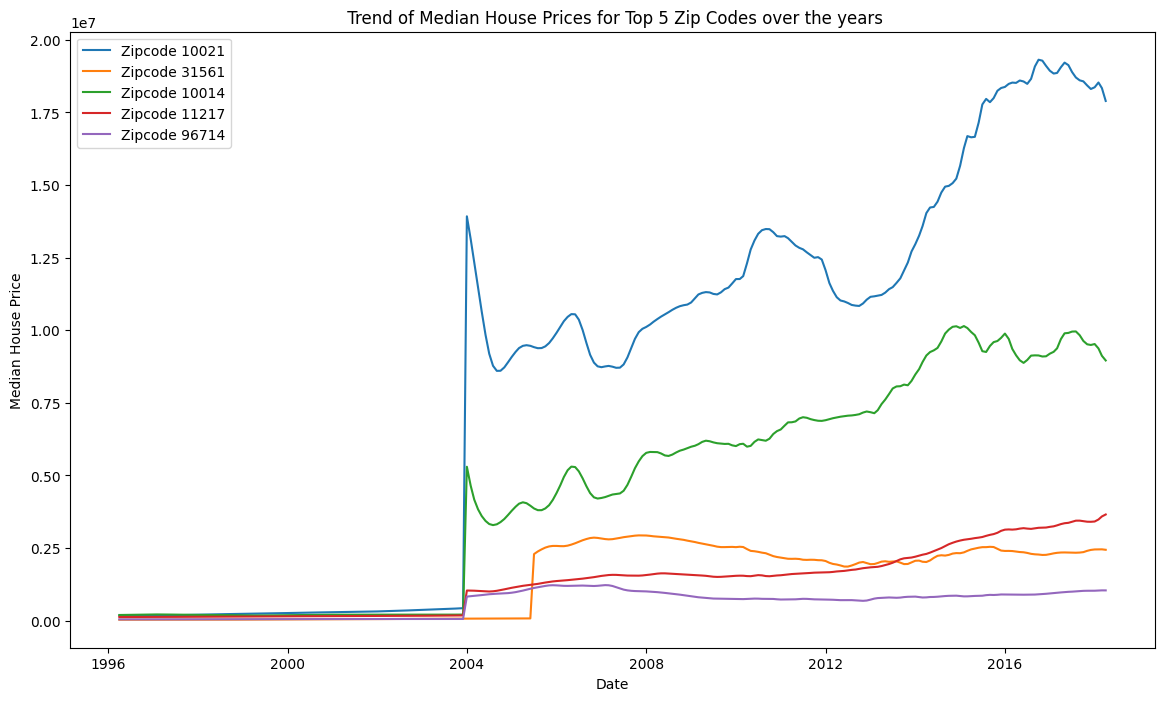

In [41]:

# Group by 'Zipcode' to analyze each zip code separately
grouped = df1.groupby('Zipcode')

# Calculate mean ROI and mean CV for each zip code
mean_roi = grouped['ROI'].mean()
mean_cv = grouped['CV'].mean()

# Analyze the top 5 zip codes based on mean ROI and low risk (mean CV)
# You may need to adjust the criteria based on your specific needs
top_zipcodes = mean_roi.nlargest(5).index
top_zipcodes

# Filter the DataFrame to include only the top zip codes
top_df = df1[df1['Zipcode'].isin(top_zipcodes)]

# Plotting the time series of median house prices for the top zip codes
plt.figure(figsize=(14, 8))
for zipcode in top_zipcodes:
    plt.plot(top_df[top_df['Zipcode'] == zipcode]['MedianHousePrice'], label=f'Zipcode {zipcode}')

plt.title(' Trend of Median House Prices for Top 5 Zip Codes over the years')
plt.xlabel('Date')
plt.ylabel('Median House Price')
plt.legend()
plt.show()

### **Time Series Ananlysis**

- WE will focus on one zipcode  among the ones that have highest ROI in our TSA

In [42]:
# We will be using one of those zipcodes for modelling
z_df = filtered_df[filtered_df['Zipcode'] =='10021']
my_series =z_df['MedianHousePrice']
my_series[:10]

Date
1996-04-01    173800.0
1996-05-01    173850.0
1996-06-01    173850.0
1996-07-01    173850.0
1996-08-01    173900.0
1996-09-01    174100.0
1996-10-01    174450.0
1996-11-01    175050.0
1996-12-01    176000.0
1997-01-01    177250.0
Name: MedianHousePrice, dtype: float64

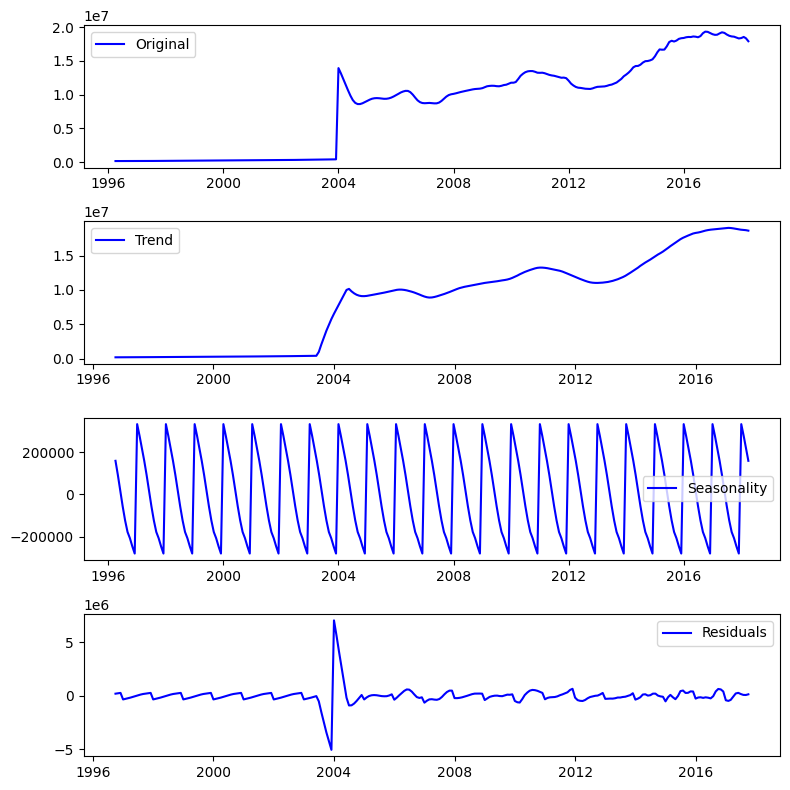

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonal_decomposition(df):
    decomposition = seasonal_decompose(df)

    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plot gathered statistics
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    #plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

seasonal_decomposition(my_series)

In [44]:
# remove data from 1996-2004
ts = my_series['2004':]
ts.head()

Date
2004-01-01    13922800.0
2004-02-01    13140500.0
2004-03-01    12333800.0
2004-04-01    11490700.0
2004-05-01    10641200.0
Name: MedianHousePrice, dtype: float64

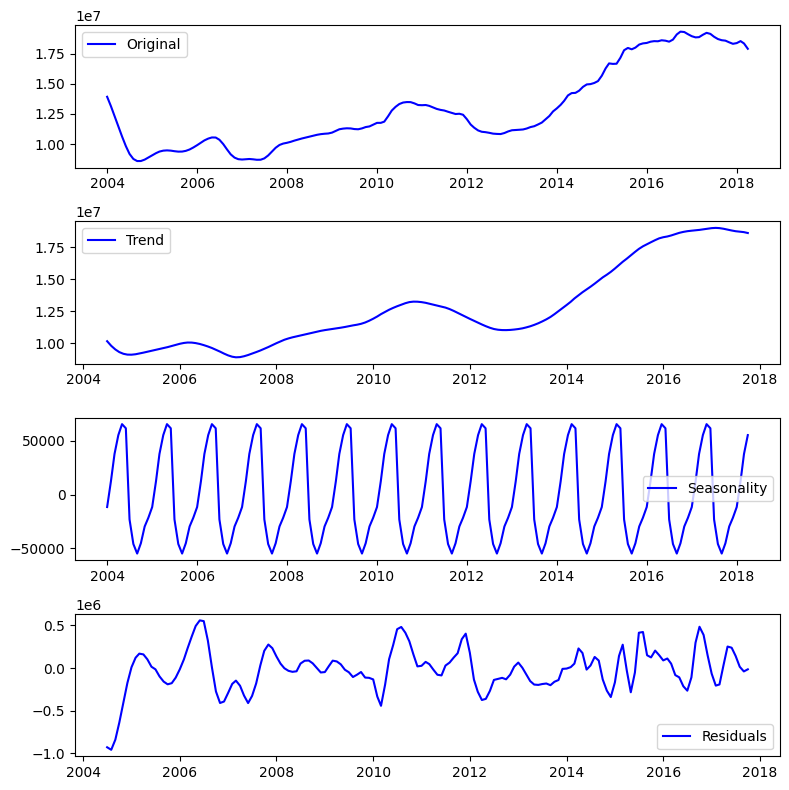

In [45]:
seasonal_decomposition(ts)

- Now this gives a better view of our series components, with seasonality, trend and residual patterns clearly visible

##### Stationarity Check
- In time series analysis. The assumption made is that the data is stationary.

- Stationarity basically means that the statistical properties of the data don't change over time. This includes things like the mean, variance, and how observations are correlated with each other at different time lags.

- We use the Dickey-Fuller test to check stationarity of our series.If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary.

In [46]:
def stationarity_check(df):
    dftest = adfuller(df)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)
stationarity_check(ts)

Test Statistic                  -1.488510
p-value                          0.539187
#Lags Used                      14.000000
Number of Observations Used    157.000000
dtype: float64


- The p_value is greater than 0.05, and the test_statistic is also greater than the critical values,therefore we confirm that the time series is not stationary
-  Differencing is one of the techniques used to make data stationary.

In [47]:
ts =  ts.diff(1).diff(12).dropna()
stationarity_check(ts)
# stationarity_check(ts)

Test Statistic                  -3.064492
p-value                          0.029295
#Lags Used                      12.000000
Number of Observations Used    146.000000
dtype: float64


- The p_value is less than 0.05 and also the test statistic is less than all of the critical values. The series has been made stationary

<Figure size 1000x400 with 0 Axes>

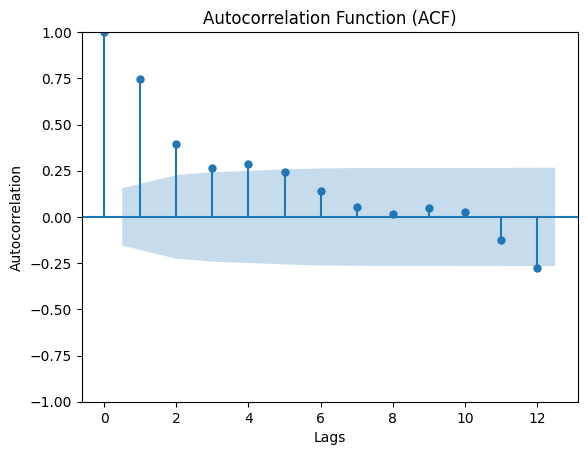

In [48]:
# Plotting only one graph for ACF
plt.figure(figsize=(10, 4))
plot_acf(ts, lags=12)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show();

The value of q=4.

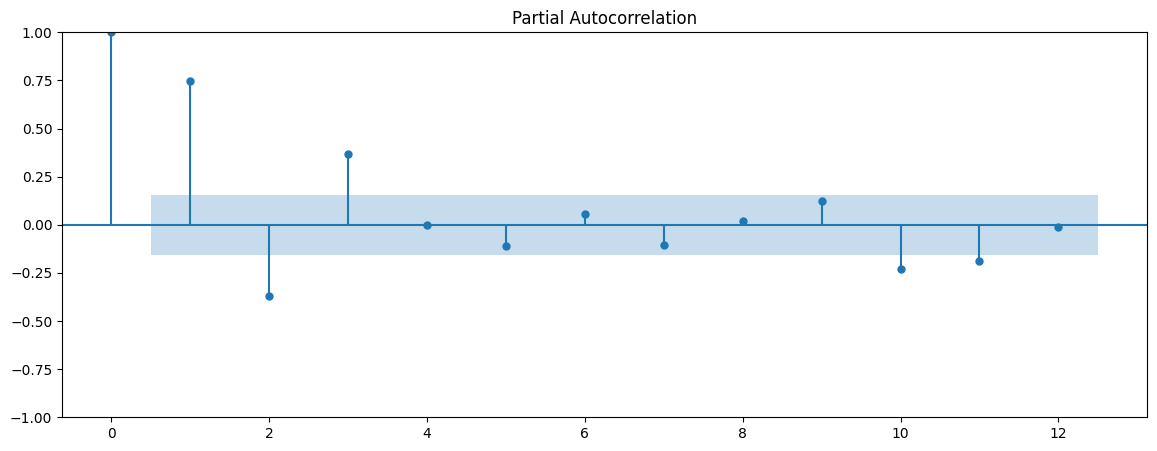

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plot_pacf(ts, lags=12, method='ywm');

- p=2

- **Baseline Model**

- We will use the ARIMA model as our baseline model.

- The train-test split for a time series is a little different from what we are used to. Because chronological order matters, we cannot randomly sample points in our data. Instead, we cut off a portion of our data at the end, and reserve it as our test set.

In [50]:
# Define train and test sets according to the index found above
# find the index which allows us to split off 20% of the data
cutoff = round(ts.shape[0]*0.7)
cutoff
train = ts[:cutoff]

test = ts[cutoff:]

In [51]:
# Creating ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
# Defining the ARIMA parameters
p = 2 #  Autoregressive parameter
d = 0  # Differencing parameter
q = 4# Moving average parameter

# Creating the ARIMA model
arima_model = ARIMA(train, order=(p, d, q))
arima_result = arima_model.fit()

# Printing the summary of the ARIMA model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:       MedianHousePrice   No. Observations:                  111
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -1429.382
Date:                Sat, 29 Jun 2024   AIC                           2874.763
Time:                        15:43:24   BIC                           2896.440
Sample:                    02-01-2005   HQIC                          2883.557
                         - 04-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.898e+04   1.22e+05      0.567      0.571   -1.69e+05    3.07e+05
ar.L1          0.2062      0.265      0.777      0.437      -0.314       0.726
ar.L2          0.5096      0.282      1.809      0.0

RMSE: 334695.9709849217


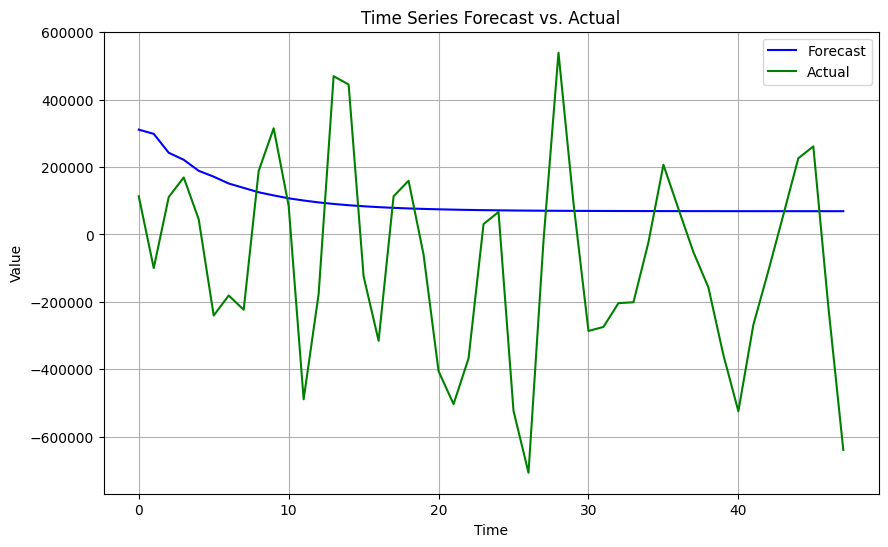

In [52]:
# Forecasting
from sklearn.metrics import mean_squared_error
forecast = arima_result.forecast(steps=len(test))

# Evaluate forecast
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

time_index = range(len(test))
# Plot the forecast and actual data
plt.figure(figsize=(10, 6))
plt.plot(time_index, forecast, label='Forecast', color='blue')
plt.plot(time_index, test, label='Actual', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast vs. Actual')
plt.legend()
plt.grid(True)
plt.show()

- Forecast (Blue Line):
The blue line represents the forecasted values.
It appears relatively smooth, suggesting a model’s prediction over time.
-Actual (Green Line):
The green line represents the actual recorded values.
It is highly volatile, with sharp peaks and troughs.
-Problem in the Forecast:
The forecast fails to accurately predict extreme variations seen in the actual data.
At various points, the forecast underestimates or overestimates the actual values.
This discrepancy indicates that the forecasting model may not handle the data’s volatility effectively.


- SARIMA MODEL






- We saw that there is seasonality in the data, so the best model to use is one that also caters for seasonality-SARIMAX

In [53]:
#using auto_arima- it does a random search for the best pdq,PDQS
# !pip install pmdarima
import pmdarima as pm
sarima_model = pm.auto_arima(ts,
                             m=12,
                             seasonal=True,
                             start_p=0,
                             start_q=0,
                             start_P=0,
                             start_Q=0,
                             max_order=6,
                             test='adf',
                             error_action='warn',
                             suppress_warnings=True,
                              stepwise=True,
                              trace=False)


* The Akaike Information Criterion (AIC) tests the goodness of fit.It rewards models that achieve a high goodness-of-fit with little complexity
* A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit.
* Auto_arima does a random search and comes up with the best parameters(from the given ones) that reduce the AIC.

In [54]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  159
Model:             SARIMAX(5, 0, 4)x(2, 0, [1], 12)   Log Likelihood               -2061.598
Date:                              Sat, 29 Jun 2024   AIC                           4149.196
Time:                                      15:46:54   BIC                           4189.092
Sample:                                  02-01-2005   HQIC                          4165.398
                                       - 04-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7412     22.900      0.032      0.974     -44.142      45.624
ar.L2          0.0914     10.021      0.009      0.993     -19.549      19.732
ar.L3         -0.1136      4.659     -0.024      0.981      -9.245       9.018
ar.L4          0.2884      1.099      0.263      0.793      -1.865       2.442
ar.L5         -0.0922      6.363     -0.014      0.988     -12.564      12.379
ma.L1          1.0601     22.849      0.046      0.963     -43.722      45.842
ma.L2          0.0787     31.161      0.003      0.998     -60.996      61.153
ma.L3         -0.4518     11.784     -0.038      0.969     -23.548      22.644
ma.L4          0.0574      5.963      0.010      0.992     -11.629      11.744
ar.S.L12      -0.2964      0.249     -1.190      0.234      -0.784       0.192
ar.S.L24      -0.2328      0.226     -1.028      0.304      -0.677       0.211
ma.S.L12      -0.6946      0.260     -2.670      0.008      -1.205      -0.185
sigma2      1.479e+10   5.38e-08   2.75e+17      0.000    1.48e+10    1.48e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.92
Prob(Q):                              0.78   Prob(JB):                         0.03
Heteroskedasticity (H):               2.90   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.79e+33. Standard errors may be unstable.
"""

This model has a high AIC. Will look for other values of pdq and s that might lower it

In [55]:
my_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = my_model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   MedianHousePrice   No. Observations:                  159
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1824.719
Date:                            Sat, 29 Jun 2024   AIC                           3659.439
Time:                                    15:46:54   BIC                           3673.853
Sample:                                02-01-2005   HQIC                          3665.296
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0467      0.510     -0.092      0.927      -1.047       0.953
ma.L1          0.5443      0.410   

-  The aic has improved. So lets check the distribution of residuals for this model

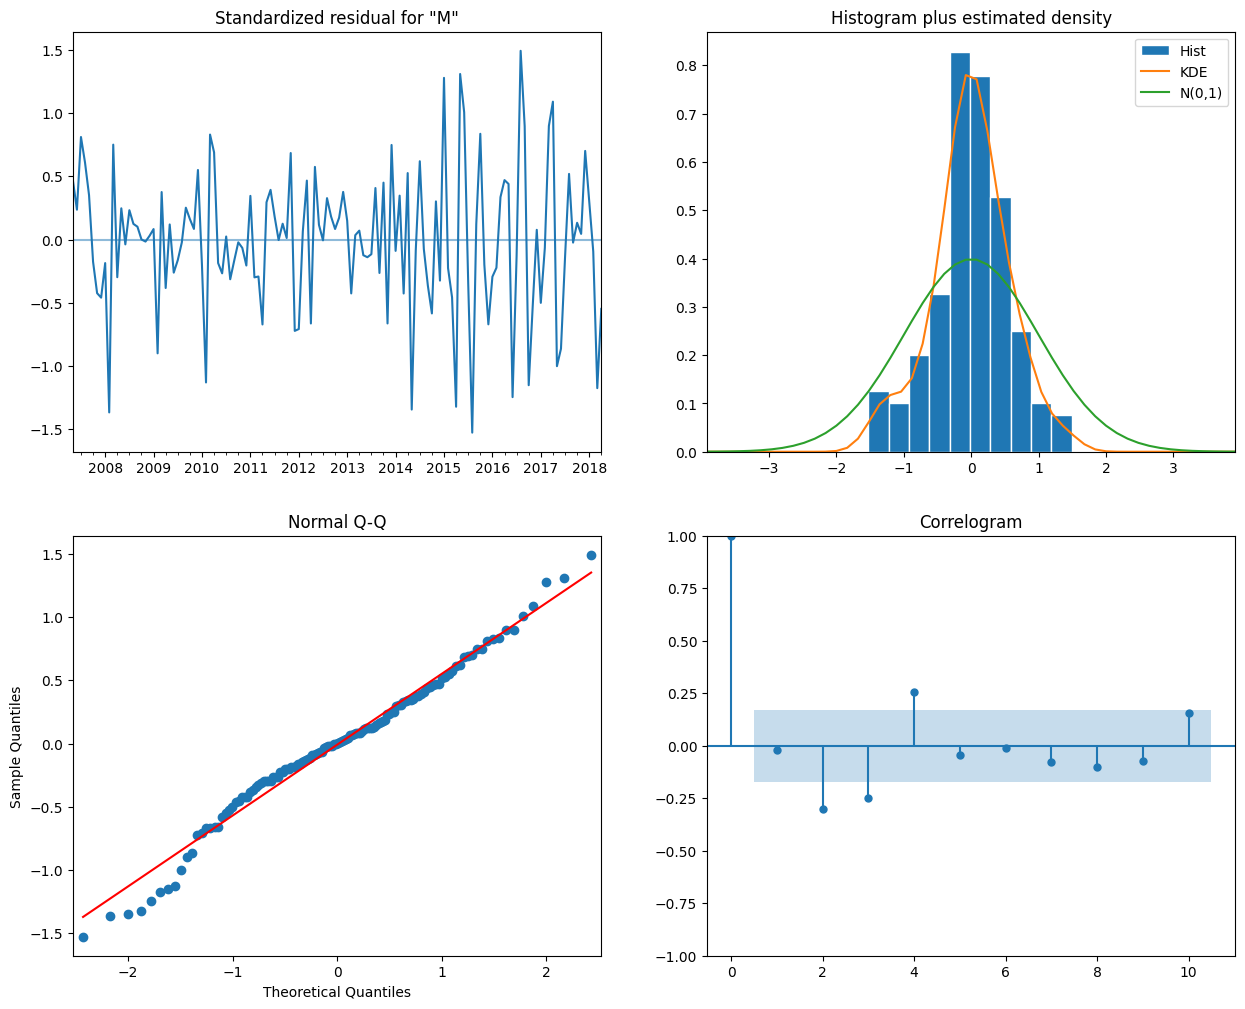

In [56]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

-  **Forecasting and Model Evaluation**:
- We compare predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

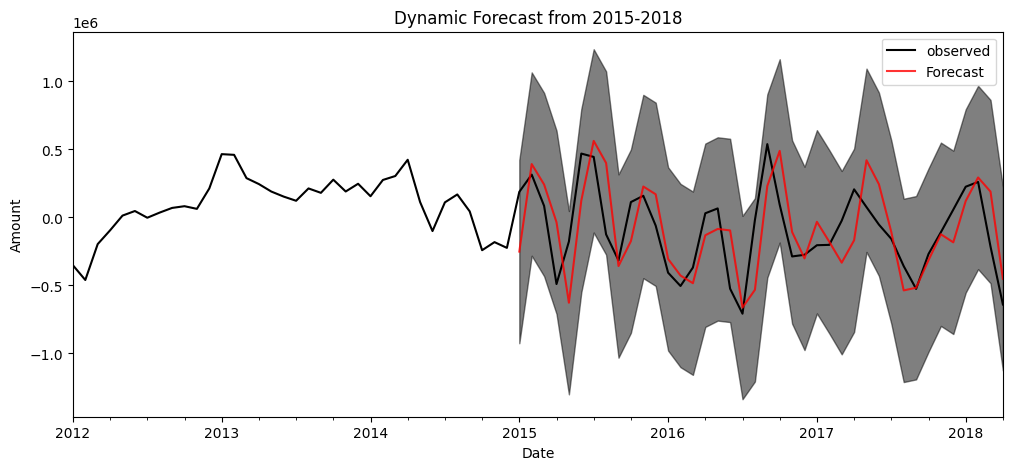

In [57]:
import matplotlib.dates as mdates
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

pred_ci = pred.conf_int() # this gives us the confidence interval for our forecasts
num_index = mdates.date2num(pred_ci.index)

plt.figure(figsize = (12,5))
ax = ts['2012':].plot(label='observed',color='black')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.5)

ax.set_title('Dynamic Forecast from 2015-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [58]:
# rmse = np.sqrt(mean_squared_error(y_truth1, y_forecasted1))
# print(f"RMSE: {rmse:.2f}")
# evaluation
y_forecasted1 = pred.predicted_mean
y_truth1 = ts['2015-01-01':]
mean_absolute_percentage_error(y_truth1, y_forecasted1)
rmse = np.sqrt(mean_squared_error(y_truth1, y_forecasted1))
print(f"RMSE: {rmse:.2f}")


RMSE: 263342.52


In [59]:
my_series = my_series[my_series.index >= '2004-01-01'] # Use .index to access the index of the Series
my_series = my_series.reset_index(name='y') # Convert the index to a column named 'y'
my_series.columns = ['ds','y'] # Rename the original index column to 'ds'
my_series.head()

,ds,y
0,2004-01-01,13922800.0
1,2004-02-01,13140500.0
2,2004-03-01,12333800.0
3,2004-04-01,11490700.0
4,2004-05-01,10641200.0


- facebook prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvaqabur4/8xzmxaoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvaqabur4/lragcozc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94851', 'data', 'file=/tmp/tmpvaqabur4/8xzmxaoh.json', 'init=/tmp/tmpvaqabur4/lragcozc.json', 'output', 'file=/tmp/tmpvaqabur4/prophet_modelx7rnub_o/prophet_model-20240629154657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


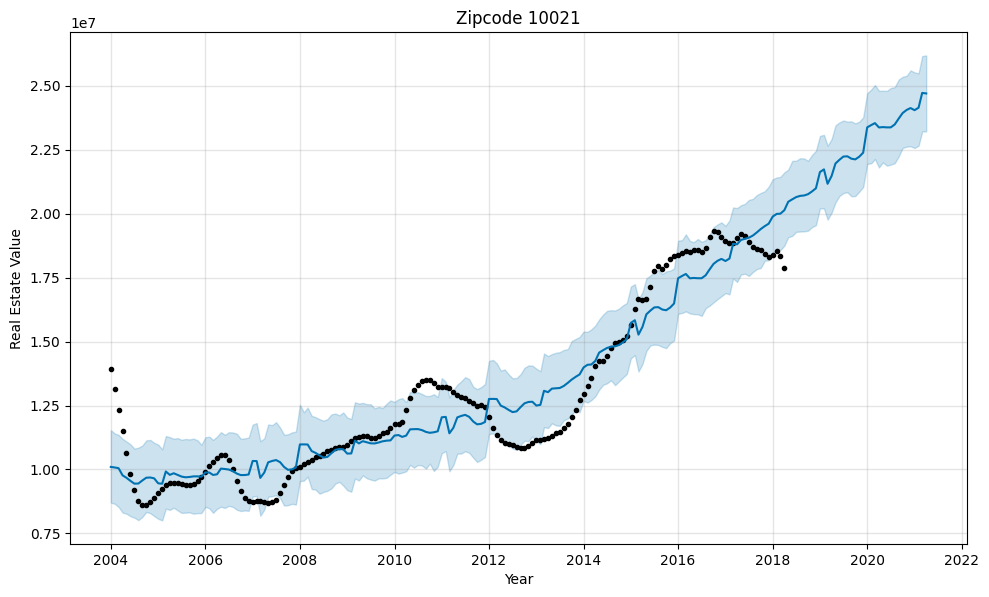

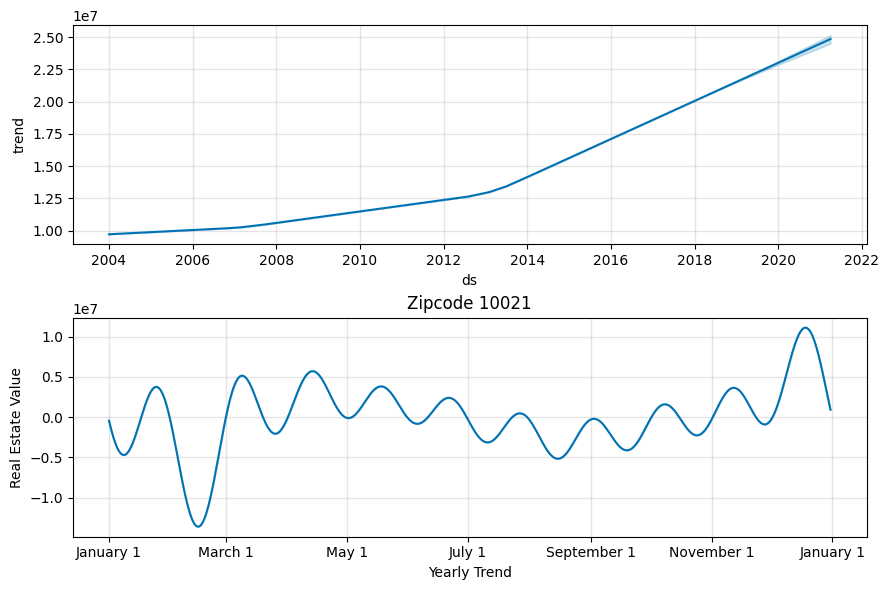

In [60]:
from prophet import Prophet
model= Prophet()
model.fit(my_series)

#making predictions
future_dates = model.make_future_dataframe(periods=36,freq='MS')
forecast = model.predict(future_dates)

forecasted_data=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data

model.plot(forecast, uncertainty=True)
plt.title('Zipcode 10021')
plt.ylabel('Real Estate Value')
plt.xlabel('Year')
model.plot_components(forecast)
plt.title('Zipcode 10021')
plt.ylabel('Real Estate Value')
plt.xlabel('Yearly Trend');